In [1]:
# Playing around with the scikit-learn polynomial features preprocessor

In [28]:
from __future__ import division
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Perceptron, LinearRegression
from sklearn.pipeline import Pipeline
from scipy.interpolate import spline
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Test out the preprocessor PolynomialFeatures
X = np.arange(6).reshape(3,2)

In [4]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [7]:
poly = PolynomialFeatures(degree=2)

In [8]:
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

In [9]:
# Combine polynomial feature generation and linear modeling into a single
# model object.

In [10]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                  ('linear', LinearRegression(fit_intercept=False))])

In [11]:
# fit to an order 3 polynomial
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3 

In [12]:
model = model.fit(x[:, np.newaxis], y)

In [13]:
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

In [33]:
# So the linear model directly recovers the underlying polynomial exactly!
predict_on_training_set = spline(x, model.predict(x[:, np.newaxis]), 3)

In [47]:
x_smooth = np.linspace(x.min(), x.max(), 200)
y_predict_smooth = spline(x, model.predict(x[:, np.newaxis]), x_smooth)

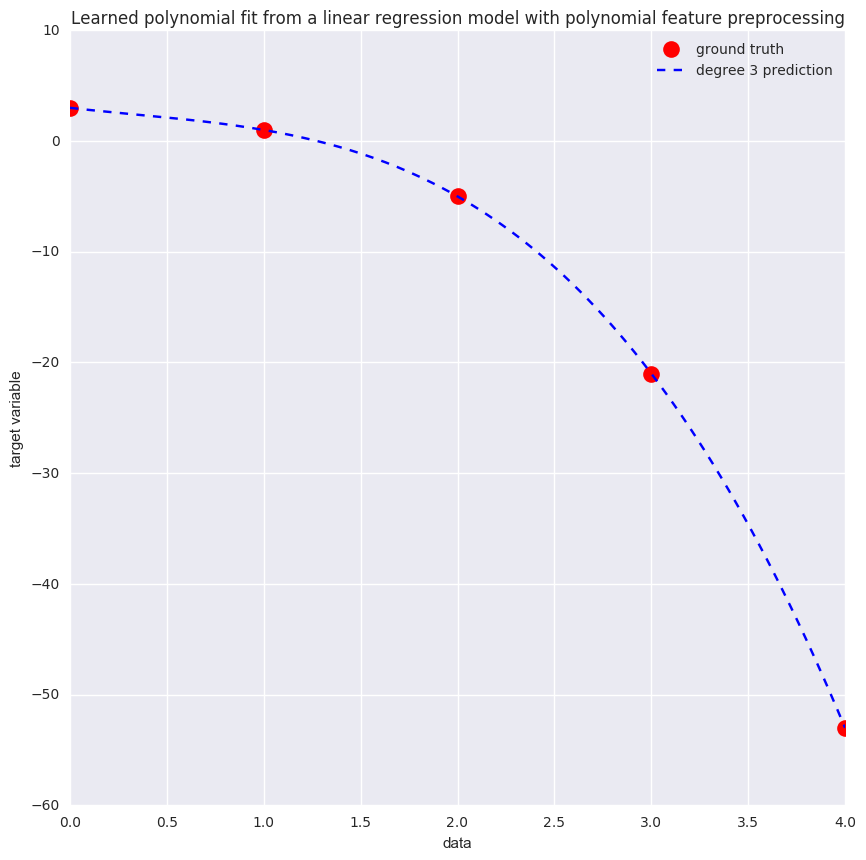

In [55]:
plt.figure(figsize=(10,10))
plt.plot(x, y, 'ro', label='ground truth', markersize=12)
plt.plot(x_smooth, y_predict_smooth, 'b--', label='degree 3 prediction')
plt.legend(loc='best')
plt.title('Learned polynomial fit from a linear regression model with polynomial feature preprocessing')
plt.xlabel('data')
plt.ylabel('target variable')

In [56]:
# We can also focus entirely on interaction only terms to solve the XOR 
# problem

In [57]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]

In [58]:
y

array([0, 1, 1, 0])

In [61]:
X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)

In [62]:
X

array([[1, 0, 0, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 0],
       [1, 1, 1, 1]])

In [63]:
clf = Perceptron(fit_intercept=False, n_iter=10, shuffle=False).fit(X, y)

In [64]:
# The classifier "predictions" here are perfect
clf.predict(X)

array([0, 1, 1, 0])

In [65]:
clf.score(X, y)

1.0

In [ ]:
# Note: XOR problem = exlusive or problem. That is, generate a truth table
# that looks like this:

# a	b	a XOR b
# 1	1	0
# 0	1	1
# 1	0	1
# 0	0	0